In [1]:
import torch
import numpy as np

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

2.3.1
True
0
NVIDIA GeForce GTX 1060


In [3]:
device = 'cpu'

## Introduction to Tensors

### Creating Tensors

In [4]:
# a scalar is a 0 dimensional tensor
scalar = torch.tensor(9)
print(scalar.ndim)
print(scalar)
print(scalar.item())

0
tensor(9)
9


In [5]:
# an array is a 1 dimensonal tensor
e = torch.tensor(np.array([np.e,np.e]))
print(e.dim())
print(e)
print(e[1].item())

1
tensor([2.7183, 2.7183], dtype=torch.float64)
2.718281828459045


In [6]:
# an nD-array is an n dimensonal tenosr
e = torch.tensor(np.array([ [[0,1,2,3,4],
                             [5,6,7,8,9],
                             [10,11,12,13,14]],
                            
                            [[5,6,7,8,9],
                             [5,6,7,8,9],
                             [10,11,12,13,14]],
                          
                            [[0,1,2,3,4],
                             [5,6,7,8,9],
                             [0,1,2,3,4]] ]))

# here there are 3 dimensions
# tensors are a generalization of matrices
print(e)

# indexing is along the dimensions, outer-inner
print(e[0,2,2].item())

# get the number of dimensions
print(e.ndim)
# get the number of elements for each dimension (shape)
print(e.shape)
torch.stack([e,e], dim=0)


tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[ 5,  6,  7,  8,  9],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [ 0,  1,  2,  3,  4]]])
12
3
torch.Size([3, 3, 5])


tensor([[[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9],
          [10, 11, 12, 13, 14]],

         [[ 5,  6,  7,  8,  9],
          [ 5,  6,  7,  8,  9],
          [10, 11, 12, 13, 14]],

         [[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9],
          [ 0,  1,  2,  3,  4]]],


        [[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9],
          [10, 11, 12, 13, 14]],

         [[ 5,  6,  7,  8,  9],
          [ 5,  6,  7,  8,  9],
          [10, 11, 12, 13, 14]],

         [[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9],
          [ 0,  1,  2,  3,  4]]]])

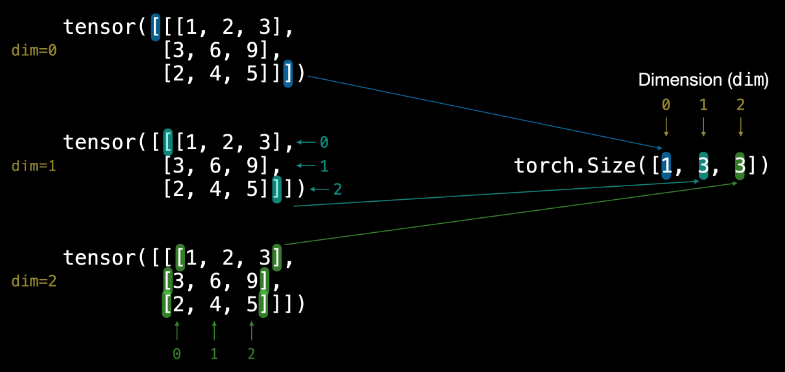

In [7]:
# creating a random tensor
t_random = torch.rand(size=(2,3,3), device=device)
print(t_random, t_random.dtype, t_random.device)
print()

# creating a zeros tensor
t_zeros = torch.zeros(size=(1,3,3))
print(t_zeros, t_zeros.dtype)
print()

# creating a ones tensor
t_ones = torch.zeros(size=(1,2,3))
print(t_ones, t_ones.dtype)


tensor([[[0.2066, 0.2367, 0.2951],
         [0.5787, 0.1496, 0.7973],
         [0.2363, 0.9432, 0.6907]],

        [[0.6215, 0.1253, 0.4780],
         [0.9981, 0.6845, 0.1414],
         [0.1677, 0.2264, 0.3933]]]) torch.float32 cpu

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]) torch.float32

tensor([[[0., 0., 0.],
         [0., 0., 0.]]]) torch.float32


In [8]:
t1 = t_random.clone().detach()
t1 = torch.ones_like(t1, dtype=torch.int)
t1

tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=torch.int32)

In [9]:
t1 = t1 + 4
t1 = t1 * 4
t1 = t1 / 2
print(t1, "\n")
print(f"t1 * t1 = {t1 * t1}")

tensor([[[10., 10., 10.],
         [10., 10., 10.],
         [10., 10., 10.]],

        [[10., 10., 10.],
         [10., 10., 10.],
         [10., 10., 10.]]]) 

t1 * t1 = tensor([[[100., 100., 100.],
         [100., 100., 100.],
         [100., 100., 100.]],

        [[100., 100., 100.],
         [100., 100., 100.],
         [100., 100., 100.]]])


In [10]:
# vector dot product using tensors
t1 = torch.arange(0,32,2)

print("t1 =")
print(t1)
print()
print(f"dimensions = {t1.ndim}, t1 shape = {t1.shape}")

t1 = t1.reshape([2,2,4])

print("t1 =")
print(t1)
print(f"dimensions = {t1.ndim}, t1 shape = {t1.shape}")

t1 =
tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

dimensions = 1, t1 shape = torch.Size([16])
t1 =
tensor([[[ 0,  2,  4,  6],
         [ 8, 10, 12, 14]],

        [[16, 18, 20, 22],
         [24, 26, 28, 30]]])
dimensions = 3, t1 shape = torch.Size([2, 2, 4])


In [11]:
t1 = torch.arange(0,10,2).reshape([1,5])
t1_transpose = torch.transpose_copy(t1, dim0=1, dim1=0)

print(t1)
print(t1.shape, t1.ndim)
print()
print(t1_transpose)
print(t1_transpose.shape, t1_transpose.ndim)

print(t1.matmul(t1_transpose))

tensor([[0, 2, 4, 6, 8]])
torch.Size([1, 5]) 2

tensor([[0],
        [2],
        [4],
        [6],
        [8]])
torch.Size([5, 1]) 2
tensor([[120]])


In [12]:
t2 = torch.tensor([1,2,3]).reshape((1,3))
torch.matmul(t2,t2.transpose(dim0=1, dim1=0))
print(t2)
t2.T


tensor([[1, 2, 3]])


tensor([[1],
        [2],
        [3]])

In [13]:
data = [[1,2], [3,4]]
data1 = np.array(data)
x_data = torch.tensor(data)

In [14]:
data2 = np.random.randint(0, 10, (4,4))
x_data2 = torch.tensor(data2)

In [15]:
print(type(data))
print(type(data1))
print(type(data2))
print(type(x_data2[0,2].item()))
print(x_data2.shape)
print(x_data2.dtype)
x_data2

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'int'>
torch.Size([4, 4])
torch.int64


tensor([[2, 0, 8, 8],
        [9, 3, 4, 6],
        [9, 0, 7, 5],
        [1, 9, 4, 7]])

In [16]:
x_ones = torch.ones_like(x_data2)
print(f"Ones Tensor: \n{x_ones}\n")

x_rand = torch.randint_like(x_data2, 0, 10, device=device)
print(f"Random Tensor [0,1]: \n{x_rand}\n")

Ones Tensor: 
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

Random Tensor [0,1]: 
tensor([[7, 6, 5, 1],
        [2, 4, 0, 7],
        [7, 1, 1, 8],
        [2, 7, 3, 6]])



In [17]:
print(f"Shape of tensor: {x_rand.shape}")
print(f"Datatype of tensor: {x_rand.dtype}")
print(f"Device tensor is stored on: {x_rand.device}")

Shape of tensor: torch.Size([4, 4])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


In [18]:
print(f"Tensor: \n{x_rand}")
print()
print(f"First row: {x_rand[0,:]}")
print(f"First column: {x_rand[:,0]}")
print(f"Main diagonal: {[x_rand[i,i] for i in range(4)]}")

Tensor: 
tensor([[7, 6, 5, 1],
        [2, 4, 0, 7],
        [7, 1, 1, 8],
        [2, 7, 3, 6]])

First row: tensor([7, 6, 5, 1])
First column: tensor([7, 2, 7, 2])
Main diagonal: [tensor(7), tensor(4), tensor(1), tensor(6)]


In [19]:
t1 = torch.cat([x_rand, x_rand, x_rand], dim=0)
t2 = torch.stack([x_rand, x_rand, x_rand], dim=2)
t2

tensor([[[7, 7, 7],
         [6, 6, 6],
         [5, 5, 5],
         [1, 1, 1]],

        [[2, 2, 2],
         [4, 4, 4],
         [0, 0, 0],
         [7, 7, 7]],

        [[7, 7, 7],
         [1, 1, 1],
         [1, 1, 1],
         [8, 8, 8]],

        [[2, 2, 2],
         [7, 7, 7],
         [3, 3, 3],
         [6, 6, 6]]])

In [20]:
tensor = torch.ones((4,4), device=device)
tensor2 = torch.zeros((4,4), device=device)
tensor2[-1,:] +=  torch.tensor(np.array([2 for i in range(len(tensor2[0]))]), device=device)

In [21]:
for i in range(4):
    tensor += tensor2
    print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [3., 3., 3., 3.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [5., 5., 5., 5.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [7., 7., 7., 7.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [9., 9., 9., 9.]])


In [22]:
print(tensor)
print(tensor2)
print(tensor2 @ tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [9., 9., 9., 9.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]])
tensor([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [24., 24., 24., 24.]])


In [23]:
x = torch.ones(4,3,2)
x

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [24]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([4,5,6])
t3 = torch.tensor([7,8,9])

t = torch.stack([t1,t2,t3], dim=0)
t = t.unsqueeze(dim=0)
print(t)
t[:,:,1]

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


tensor([[2, 5, 8]])

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [26]:
RANDOM_SEED=42
torch.manual_seed(seed=RANDOM_SEED)
A = torch.rand(size=(4,4), device=device)
torch.manual_seed(seed=RANDOM_SEED)
B = torch.rand(size=(224,224,3))

In [27]:
print(A.device)
A.cpu().numpy().device

cuda:0


'cpu'

In [28]:
!nvidia-smi

Tue Nov 26 18:16:56 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1060        Off |   00000000:01:00.0  On |                  N/A |
| N/A   44C    P0             27W /   88W |     758MiB /   6144MiB |     10%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

1. Create a random tensor with shape (7,7)

In [29]:
# torch.manual_seed(seed=42)
t1 = torch.rand(size=(7,7))
t1

tensor([[0.7848, 0.0130, 0.1144, 0.7084, 0.0385, 0.6747, 0.8613],
        [0.1244, 0.3555, 0.1167, 0.1133, 0.8600, 0.2933, 0.5889],
        [0.4117, 0.0992, 0.3078, 0.7786, 0.8016, 0.3649, 0.6286],
        [0.9663, 0.7687, 0.4566, 0.5745, 0.9200, 0.3230, 0.8613],
        [0.0919, 0.3102, 0.9536, 0.6002, 0.0351, 0.6826, 0.3743],
        [0.5220, 0.1336, 0.9666, 0.9754, 0.8474, 0.8988, 0.1105],
        [0.4563, 0.9719, 0.3968, 0.1496, 0.4743, 0.9973, 0.4436]])

2. Perform matrix multiplication with the previous tensor (t1) and another random tensor of shape (1,7)

In [30]:
torch.matmul(t1, torch.rand(size=(1,7)).transpose_(dim0=1, dim1=0))

tensor([[2.0219],
        [1.0681],
        [1.8291],
        [2.6979],
        [1.7964],
        [2.7935],
        [2.2875]])

3. Redo previous two exercieses setting the random seed to 0

In [31]:
torch.manual_seed(seed=0)
t1 = torch.rand(size=(7,7))
t2 = torch.rand(size=(1,7)).transpose_(1, 0)
torch.matmul(t1,t2)

tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]])

4. Set the random seed to 1234 for the gpu

In [32]:
torch.cuda.manual_seed(seed=1234)

5. Create two random tensors of shape (2,3) and send both to the gpu

In [33]:
torch.manual_seed(seed=1234)
t1 = torch.rand(size=(2,3)).to(device)
t2 = torch.rand(size=(2,3)).to(device)

6. Perform matrix multiplication on the previously created tensors

In [34]:
t3 = torch.matmul(t1,t2.transpose_(1,0))
t3

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]], device='cuda:0')

7. Find the maximum and minimum values in the output of 6.

In [35]:
print(torch.max(t3), torch.min(t3))

tensor(0.5617, device='cuda:0') tensor(0.3647, device='cuda:0')


8. Find the indecies of the maximum and minimum values in the output of 6.

In [36]:
print(f"max value index = {t3.argmax()}, min value index = {t3.argmin()}")

max value index = 3, min value index = 0


10. Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

In [37]:
torch.manual_seed(seed=7)

t4 = torch.rand(size=(1,1,1,10))
t5 = t4.squeeze()

print(t4, t4.shape)
print(t5, t5.shape)

tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])


In [ ]:
x = torch.tensor(3.14, dtype=torch.float16)
x.item()

torch.Tensor